# Modelo de clusterizacion con KMeans para segmentar personas con base a algunas caracteristicas fisicas.

## Autor: Mateo Londoño Rúa  [LinkedIn](www.linkedin.com/in/mateo-londono-rua117)

En este nuevo proyecto, desarrollaremos un modelo de clusterización con el objetivo de identificar y segmentar personas según ciertas características físicas de su cuerpo:

* Sexo:  Variable categórica que indica el género de la persona, generalmente clasificado como masculino o femenino. Esta variable puede ser importante para análisis relacionados con la salud y la composición corporal.
* Estado civil:  Variable categórica que describe la situación marital de la persona (por ejemplo, soltero, casado, divorciado, viudo). Puede influir en aspectos como la salud mental y el estilo de vida.
* Densidad corporal:  Medida que representa la masa corporal de una persona en relación con su volumen. Es un indicador de la composición corporal y se utiliza para evaluar la salud y el riesgo de enfermedades.
* Porcentaje de grasa:  Porcentaje que representa la cantidad de grasa en el cuerpo en relación con el peso total. Es una métrica clave en la evaluación de la composición corporal y la salud general.
* Edad:  Variable numérica que indica la edad de la persona en años. La edad es un factor importante en estudios de salud, desarrollo físico y comportamiento.
* Peso:  Medida numérica que representa el peso de la persona en libras. Es una variable fundamental en el análisis de la salud y la nutrición.
* Altura:  Medida numérica que indica la altura de la persona en pulgadas. Junto con el peso, se utiliza para calcular el índice de masa corporal (IMC) y evaluar el estado de salud.


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option nos permite ajustar las opciones de visualización del DataFrame de manera flexible

In [9]:
#para ver todos los datos del diplay
pd.set_option('display.max_columns',None)

Cuando trabajamos con datasets que provienen de diferentes fuentes, es común encontrarse con problemas relacionados con la codificación de caracteres, lo que puede generar errores al intentar cargarlos, especialmente si no están codificados en UTF-8. Para resolver este inconveniente, podemos usar la librería chardet, que nos ayuda a detectar automáticamente la codificación de un archivo.

In [11]:
# Para detectar el tipo de codificacion 
import chardet 

with open('body.csv',"rb") as data:
    lectura = chardet.detect(data.read())
    print(lectura)


{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}


Una vez que hemos identificado la codificación del archivo correctamente, el siguiente paso es importar los datos en un DataFrame usando Pandas.

In [12]:
df = pd.read_csv('body.csv', encoding = "ISO-8859-1")

Visualizamos los datos 

In [13]:
df

,Sexo,Estado civil,Densidad corporal,Porcentaje de grasa,Edad (años),Peso (libras),Altura (pulgadas)
0,FEMENINO,SOLTERO,1.0708,12.3,23,154.25,67.75
1,MASCULINO,SOLTERO,1.0708,12.3,23,154.25,67.75
2,FEMENINO,CASADO,1.0853,6.1,22,173.25,72.25
3,MASCULINO,CASADO,1.0414,25.3,22,154.00,66.25
4,FEMENINO,CASADO,1.0751,10.4,26,184.75,72.25
...,...,...,...,...,...,...,...
248,FEMENINO,CASADO,1.0736,11.0,70,134.25,67.00
249,FEMENINO,SOLTERO,1.0236,33.6,72,201.00,69.75
250,FEMENINO,SOLTERO,1.0328,29.3,72,186.75,66.00
251,FEMENINO,SOLTERO,1.0399,26.0,72,190.75,70.50


Es fundamental asegurarse de que no existan datos faltantes o nulos en el DataFrame, ya que la presencia de valores nulos puede afectar negativamente los análisis y modelos que construyamos.

In [17]:
df.isnull().sum()

Sexo                   0
Estado civil           0
Densidad corporal      0
Porcentaje de grasa    0
Edad (años)            0
Peso (libras)          0
Altura (pulgadas)      0
dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Sexo                 253 non-null    object 
 1   Estado civil         253 non-null    object 
 2   Densidad corporal    253 non-null    float64
 3   Porcentaje de grasa  253 non-null    float64
 4   Edad (años)          253 non-null    int64  
 5   Peso (libras)        253 non-null    float64
 6   Altura (pulgadas)    253 non-null    float64
dtypes: float64(4), int64(1), object(2)
memory usage: 14.0+ KB


Selección de las variables para la clusterización

In [21]:
df_use = df.drop(columns=['Sexo','Estado civil'])
df_use

,Densidad corporal,Porcentaje de grasa,Edad (años),Peso (libras),Altura (pulgadas)
0,1.0708,12.3,23,154.25,67.75
1,1.0708,12.3,23,154.25,67.75
2,1.0853,6.1,22,173.25,72.25
3,1.0414,25.3,22,154.00,66.25
4,1.0751,10.4,26,184.75,72.25
...,...,...,...,...,...
248,1.0736,11.0,70,134.25,67.00
249,1.0236,33.6,72,201.00,69.75
250,1.0328,29.3,72,186.75,66.00
251,1.0399,26.0,72,190.75,70.50


Escalamos la data 

El objetivo del escalado es transformar las características numéricas para que tengan una escala similar, lo que permite que cada variable contribuya de manera equitativa al resultado final del modelo.

In [70]:
from sklearn.preprocessing import MinMaxScaler

esc = MinMaxScaler()
df_esc = esc.fit_transform(df_use)
df_esc = pd.DataFrame(data = df_esc , columns=df_use.columns)
df_esc

,Densidad corporal,Porcentaje de grasa,Edad (años),Peso (libras),Altura (pulgadas)
0,0.665496,0.258947,0.016949,0.146127,0.792746
1,0.665496,0.258947,0.016949,0.146127,0.792746
2,0.792801,0.128421,0.000000,0.223789,0.886010
3,0.407375,0.532632,0.000000,0.145105,0.761658
4,0.703248,0.218947,0.067797,0.270795,0.886010
...,...,...,...,...,...
248,0.690079,0.231579,0.813559,0.064378,0.777202
249,0.251097,0.707368,0.847458,0.337216,0.834197
250,0.331870,0.616842,0.847458,0.278970,0.756477
251,0.394205,0.547368,0.847458,0.295320,0.849741


Inplmentamos la tecnica del codo, es una técnica popular utilizada para determinar el número óptimo de clusters en un conjunto de datos al aplicar algoritmos de clusterización, como KMeans. Este método se basa en la idea de que a medida que aumentamos el número de clusters, la variabilidad dentro de los clusters disminuirá, lo que se traduce en una menor inercia.

<Axes: >

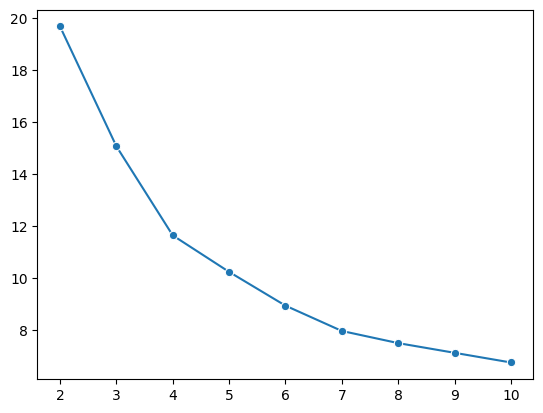

In [86]:
from sklearn.cluster import KMeans

centroides = []

for i in np.arange(2,11):
    modelo = KMeans(n_clusters = i, init = "k-means++",random_state=117)
    centroides.append((modelo.fit(df_esc)).inertia_)

#print(centroides)    

sns.lineplot( x =  np.arange(2,11) , y = centroides ,  marker = 'o' )    

Con base en los resultados obtenidos del método del codo, hemos determinado que el número óptimo de clusters para nuestro conjunto de datos es 4. Ahora procederemos a crear el modelo de clusterización utilizando el algoritmo KMeans

In [88]:
Modelo_KMeans = KMeans(n_clusters = 4, init = "k-means++",random_state=117)
Modelo_KMeans.fit(df_esc)

KMeans(n_clusters=4, random_state=117)

Integramos la etiqueta del cluster al data frame base para visualizar las caracteristricas de cada cluster

In [89]:
df_use['Cluster'] = Modelo_KMeans.labels_
df_use

,Densidad corporal,Porcentaje de grasa,Edad (años),Peso (libras),Altura (pulgadas),Cluster
0,1.0708,12.3,23,154.25,67.75,2
1,1.0708,12.3,23,154.25,67.75,2
2,1.0853,6.1,22,173.25,72.25,2
3,1.0414,25.3,22,154.00,66.25,0
4,1.0751,10.4,26,184.75,72.25,2
...,...,...,...,...,...,...
248,1.0736,11.0,70,134.25,67.00,3
249,1.0236,33.6,72,201.00,69.75,1
250,1.0328,29.3,72,186.75,66.00,1
251,1.0399,26.0,72,190.75,70.50,1


In [102]:
df_use['Cluster'].value_counts()

Cluster
0    88
3    60
2    53
1    52
Name: count, dtype: int64

Implementamos el Análisis de Componentes Principales (PCA) con el objetivo de reducir la dimensionalidad de nuestro conjunto de datos. Esta técnica nos permite simplificar la representación de nuestros datos manteniendo la mayor cantidad posible de información relevante

In [91]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_esc)
df_pca = pd.DataFrame(data = df_pca , columns=['PCA_1','PCA_2'])
df_pca

,PCA_1,PCA_2
0,-0.365313,-0.205469
1,-0.365313,-0.205469
2,-0.509822,-0.176853
3,-0.056570,-0.369034
4,-0.358525,-0.183887
...,...,...
248,-0.035156,0.521193
249,0.592288,0.203436
250,0.477974,0.275557
251,0.400890,0.301287


*  **PCA_1**: Explica el 57.92% de la varianza total en los datos. Esto significa que esta primera componente captura la mayor cantidad de información o variabilidad de las variables originales.

* **PCA_2**: Explica el 31.40% de la varianza total en los datos. Esta segunda componente captura una parte adicional importante de la variabilidad, aunque menos que la primera.

* En total, las dos primeras componentes principales (PCA_1 y PCA_2) explican el 89.32% de la variabilidad en los datos (0.5792 + 0.3140 = 0.8932).

In [123]:
print('    PCA_1      PCA_2')
print((pca.explained_variance_ratio_))
print('  Sums:  ')
print(np.sum(pca.explained_variance_ratio_))

    PCA_1      PCA_2
[0.57920394 0.31403084]
  Sums:  
0.8932347803677889


In [118]:
VARS = df.drop(columns=['Sexo','Estado civil']).columns.to_list()
VARS

['Densidad corporal',
 'Porcentaje de grasa',
 'Edad (años)',
 'Peso (libras)',
 'Altura (pulgadas)']

El gráfico muestra la relación entre las variables originales (en las filas) y las primeras dos componentes principales (en las columnas: PCA_1 y PCA_2). Estas componentes son el resultado de la descomposición de PCA.

Cada celda muestra cuánto contribuye una variable original a una de las componentes principales. Los valores pueden ser positivos o negativos, lo que indica si la variable tiene una influencia positiva o negativa en esa component

* **Columnas** PCA_1 y PCA_2: Son las primeras dos componentes principales obtenidas del análisis de PCA. Estas son combinaciones lineales de las variables originales que explican la mayor parte de la variabilidad en los datos.

* **Filas** (VARS): Cada fila corresponde a una variable original en el dataset, y muestra su relación con las componentes principales.

* **Colores**: Los colores reflejan la magnitud y dirección (positiva o negativa) de la contribución de cada variable a las componentes principales. Las celdas más oscuras indican mayor contribución.



<Axes: >

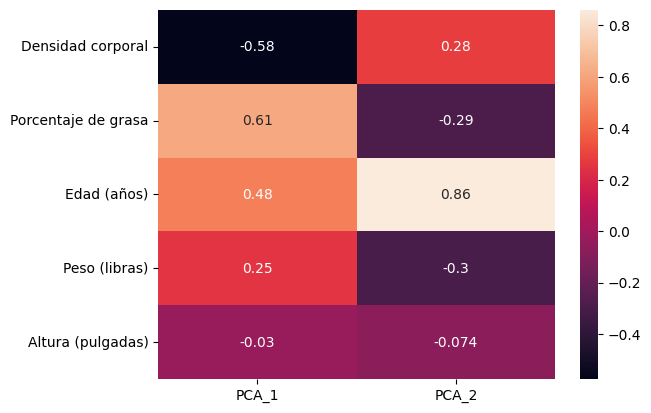

In [119]:
sns.heatmap(pd.DataFrame(np.transpose(pca.components_[0:2, :]), columns = ['PCA_1','PCA_2'], index = VARS), annot = True)

concatenamos el data frame de las componenetes principales con la etiqueta del cluster

In [96]:
df_total = pd.concat( [df_pca, df_use[['Cluster']]],axis = 1 )
df_total

,PCA_1,PCA_2,Cluster
0,-0.365313,-0.205469,2
1,-0.365313,-0.205469,2
2,-0.509822,-0.176853,2
3,-0.056570,-0.369034,0
4,-0.358525,-0.183887,2
...,...,...,...
248,-0.035156,0.521193,3
249,0.592288,0.203436,1
250,0.477974,0.275557,1
251,0.400890,0.301287,1


Este gráfico permite visualizar cómo los datos se agrupan en diferentes clusters en el espacio de las dos principales componentes. Cada color representa un grupo de observaciones que comparten similitudes en sus características originales.

El gráfico ayuda a evaluar si los clusters están bien separados o si existen superposiciones entre ellos.

<Axes: xlabel='PCA_1', ylabel='PCA_2'>

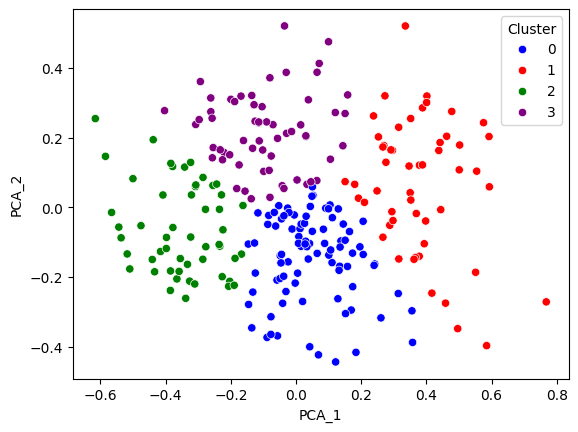

In [107]:
sns.scatterplot( x = df_total['PCA_1'] , y = df_total['PCA_2'] , hue = df_total['Cluster'] , palette = ['blue','red','green','purple'] )

Realizamos un perfilamiento exhaustivo de cada cluster identificado en nuestro análisis. Para ello, utilizamos la función describe() de pandas, que proporciona un resumen estadístico de las características de cada grupo

Para cada cluster, analizamos variables clave como la densidad corporal, el porcentaje de grasa, la edad, el peso y la altura, entre otros. A continuación, se presentan los resúmenes estadísticos de cada cluster:

In [110]:
#perfilamiento
df_use[df_use['Cluster'] == 0].describe()

,Densidad corporal,Porcentaje de grasa,Edad (años),Peso (libras),Altura (pulgadas),Cluster
count,88.000000,88.000000,88.000000,88.000000,88.000000,88.0
mean,1.047444,22.594318,38.750000,190.846591,71.156250,0.0
std,0.009110,4.068052,6.736843,22.630923,2.121088,0.0
min,1.018000,15.900000,22.000000,148.000000,66.000000,0.0
25%,1.041550,20.000000,35.000000,173.625000,69.500000,0.0
50%,1.048700,22.050000,40.500000,187.375000,71.250000,0.0
75%,1.053200,25.225000,43.000000,207.000000,72.750000,0.0
max,1.062400,34.300000,50.000000,247.250000,75.500000,0.0


In [111]:
df_use[df_use['Cluster'] == 1].describe()

,Densidad corporal,Porcentaje de grasa,Edad (años),Peso (libras),Altura (pulgadas),Cluster
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.0
mean,1.032796,29.334615,58.615385,197.909615,68.711538,1.0
std,0.010391,4.874982,9.476811,34.062384,6.171047,0.0
min,0.995000,21.500000,42.000000,150.250000,29.500000,1.0
25%,1.026250,26.000000,50.750000,176.000000,67.437500,1.0
50%,1.034000,28.700000,59.000000,197.375000,69.500000,1.0
75%,1.039900,32.375000,66.250000,215.625000,71.562500,1.0
max,1.049800,47.500000,81.000000,363.150000,76.000000,1.0


In [112]:
df_use[df_use['Cluster'] == 2].describe()

,Densidad corporal,Porcentaje de grasa,Edad (años),Peso (libras),Altura (pulgadas),Cluster
count,53.000000,53.000000,53.000000,53.000000,53.000000,53.0
mean,1.076183,9.907547,31.566038,160.743396,70.424528,2.0
std,0.010444,4.253725,6.434610,21.992053,2.790172,0.0
min,1.058400,0.000000,22.000000,118.500000,64.750000,2.0
25%,1.069000,6.600000,27.000000,145.750000,68.000000,2.0
50%,1.075400,10.100000,30.000000,156.750000,70.000000,2.0
75%,1.083000,12.500000,38.000000,182.000000,72.250000,2.0
max,1.108900,17.700000,44.000000,216.000000,77.500000,2.0


In [113]:
df_use[df_use['Cluster'] == 3].describe()

,Densidad corporal,Porcentaje de grasa,Edad (años),Peso (libras),Altura (pulgadas),Cluster
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.0
mean,1.069287,13.325000,53.383333,160.633333,69.633333,3.0
std,0.010215,4.182718,6.899009,18.263228,2.662302,0.0
min,1.049900,4.000000,42.000000,125.000000,64.000000,3.0
25%,1.062225,10.500000,47.750000,151.500000,67.500000,3.0
50%,1.067800,13.700000,53.500000,160.125000,69.375000,3.0
75%,1.075975,17.000000,56.250000,171.375000,71.500000,3.0
max,1.099100,21.500000,72.000000,224.500000,77.750000,3.0


Este perfilamiento nos permite identificar patrones y tendencias en cada grupo, lo que es esencial para la toma de decisiones estratégicas y la personalización de intervenciones.

**Observaciones**: 
* Podemos ver que los mas adultos, los mas bajitos y los que mas Porcentaje de grasa tienen son los que pertenecen al clustes 1, Son los que tienen la probabilidad más alta de sufrir alguna enfermedad
* Los mas altos pertenecen al cluster 0
* podemos ver que los mas jovenes son los que tienen menos Porcentaje de grasa	y pertenecen al cluster 2, esto puede deverse a un metavolismo mas acelerado

**Agregamos la etiqueta del Cluster al df inicial**

In [124]:
df['Cluster'] = Modelo_KMeans.labels_
df

,Sexo,Estado civil,Densidad corporal,Porcentaje de grasa,Edad (años),Peso (libras),Altura (pulgadas),Cluster
0,FEMENINO,SOLTERO,1.0708,12.3,23,154.25,67.75,2
1,MASCULINO,SOLTERO,1.0708,12.3,23,154.25,67.75,2
2,FEMENINO,CASADO,1.0853,6.1,22,173.25,72.25,2
3,MASCULINO,CASADO,1.0414,25.3,22,154.00,66.25,0
4,FEMENINO,CASADO,1.0751,10.4,26,184.75,72.25,2
...,...,...,...,...,...,...,...,...
248,FEMENINO,CASADO,1.0736,11.0,70,134.25,67.00,3
249,FEMENINO,SOLTERO,1.0236,33.6,72,201.00,69.75,1
250,FEMENINO,SOLTERO,1.0328,29.3,72,186.75,66.00,1
251,FEMENINO,SOLTERO,1.0399,26.0,72,190.75,70.50,1


Podemos visualizar el top 5 de las personas con mayor Porcentaje de grasa.
La persona que tiene el mayor Porcentaje de grasa es hombre,es casado y pertenece al cluster 1.

In [142]:
df_top_grasa = df.sort_values(by='Porcentaje de grasa', ascending=False).head(5)
df_top_grasa

,Sexo,Estado civil,Densidad corporal,Porcentaje de grasa,Edad (años),Peso (libras),Altura (pulgadas),Cluster
216,MASCULINO,CASADO,0.9950,47.5,51,219.00,64.00,1
36,MASCULINO,CASADO,1.0101,40.1,49,191.75,65.00,1
192,FEMENINO,SOLTERO,1.0140,38.1,42,244.25,76.00,1
39,FEMENINO,SOLTERO,1.0202,35.2,46,363.15,72.25,1
242,MASCULINO,SOLTERO,1.0207,35.0,65,224.50,68.25,1


Podemos visualizar el top 5 de las personas con mayor altura.
La persona  mas alta es mujer,es casada y pertenece al Cluster 3.

In [143]:
df_top_altura = df.sort_values(by='Altura (pulgadas)', ascending=False).head(5)
df_top_altura

,Sexo,Estado civil,Densidad corporal,Porcentaje de grasa,Edad (años),Peso (libras),Altura (pulgadas),Cluster
96,FEMENINO,CASADO,1.0991,17.4,53,224.50,77.75,3
145,FEMENINO,CASADO,1.0754,10.3,23,188.15,77.50,2
12,FEMENINO,SOLTERO,1.0812,7.8,27,216.00,76.00,2
192,FEMENINO,SOLTERO,1.0140,38.1,42,244.25,76.00,1
109,FEMENINO,CASADO,1.0593,17.3,43,194.00,75.50,0


Finalmente visualizamos el top 5 de las personas con mayor peso.
La persona con mayor peso es mujer, es soltera y pertenece al Cluster 1.

In [144]:
df_top_peso = df.sort_values(by='Peso (libras)', ascending=False).head(5)
df_top_peso

,Sexo,Estado civil,Densidad corporal,Porcentaje de grasa,Edad (años),Peso (libras),Altura (pulgadas),Cluster
39,FEMENINO,SOLTERO,1.0202,35.2,46,363.15,72.25,1
41,FEMENINO,SOLTERO,1.0217,34.5,45,262.75,68.75,1
35,MASCULINO,SOLTERO,1.0263,32.3,41,247.25,73.50,0
192,FEMENINO,SOLTERO,1.0140,38.1,42,244.25,76.00,1
152,FEMENINO,SOLTERO,1.0542,19.6,26,241.75,74.50,0


En este grafico podemos evidenciar que la poblacion dominante son mujeres casadas 

<Axes: xlabel='Estado civil,Sexo'>

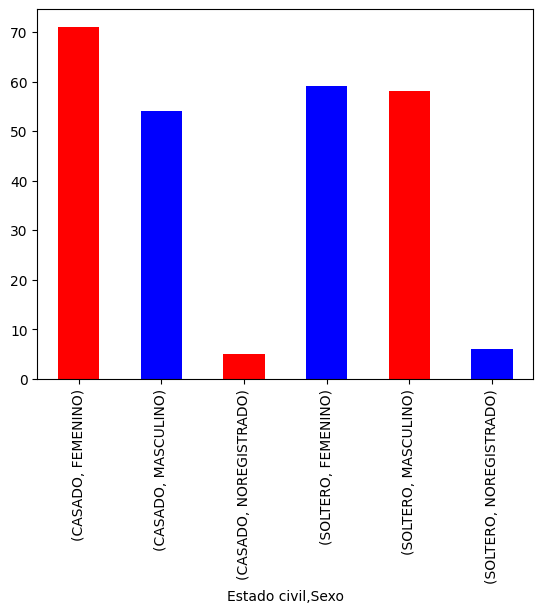

In [147]:
df[['Estado civil' ,'Sexo']].value_counts(sort=False).plot(kind='bar', color=['r','b'])